<a href="https://colab.research.google.com/github/PaolaDaft/ML_Morelos_Notebooks2024/blob/main/Clase5/Workshop/Workshop_ML_Clasificacion_(A_COMPLETAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### WorkShop: Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

**Resolución**: EDA (Análisis Exploratorio de Datos)

1. Importar las librerías necesarias para la realización del desafío y el dataset propuesto para la ejercitación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_tennis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/📊 Desarrollo de habilidades en INTELIGENCIA ARTIFICIAL Y DATA/Clase 5/Workshop/Titanic.csv", sep = ",")

2. Imprimir las 5 primeras filas del dataset.

In [4]:
data_tennis.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


3. Imprimir las 5 primeras últimas filas del dataset.

In [5]:
data_tennis.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0
713,0,3,0,32.0,0,0


4. Imprimir las dimensiones del dataset.

In [6]:
data_tennis.shape

(714, 6)

5. Obtener la totalidad de registros por columnas

In [7]:
data_tennis.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64

6. Analizar el tipo de dato de cada columna

In [10]:
data_tennis.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

7. Obtener el tipo de estructura del dataset

In [13]:
data_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 33.6 KB


8. Listar los nombres de las columnas

In [14]:
data_tennis.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

**Resolución**: Machine Learning - Modelo de Clasificación

9.	Separar los features en X e y

In [18]:
#Seperamos en X e y
X = data_tennis.drop("Survived", axis=1) #Elimino de mi dataset la variable a predecir
y = data_tennis.Survived #Defino el Target

10. Separar los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [21]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

11.	Crear un objeto de Árbol de Decisión para un modelo de clasificación, con un Nivel de Profundidad = 2 y una Semilla para la reproducibilidad = 42

In [19]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

12.	Entrenar el modelo creado

In [22]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

13. Realizar la predicción del modelo en Train y Test

In [23]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

14.	Calcular la métrica de Accuracy en Train y Test

In [25]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8096192384769539
% de aciertos sobre el set de evaluación: 0.786046511627907


15. Graficar las variables de importancia del Árbol de Decisión

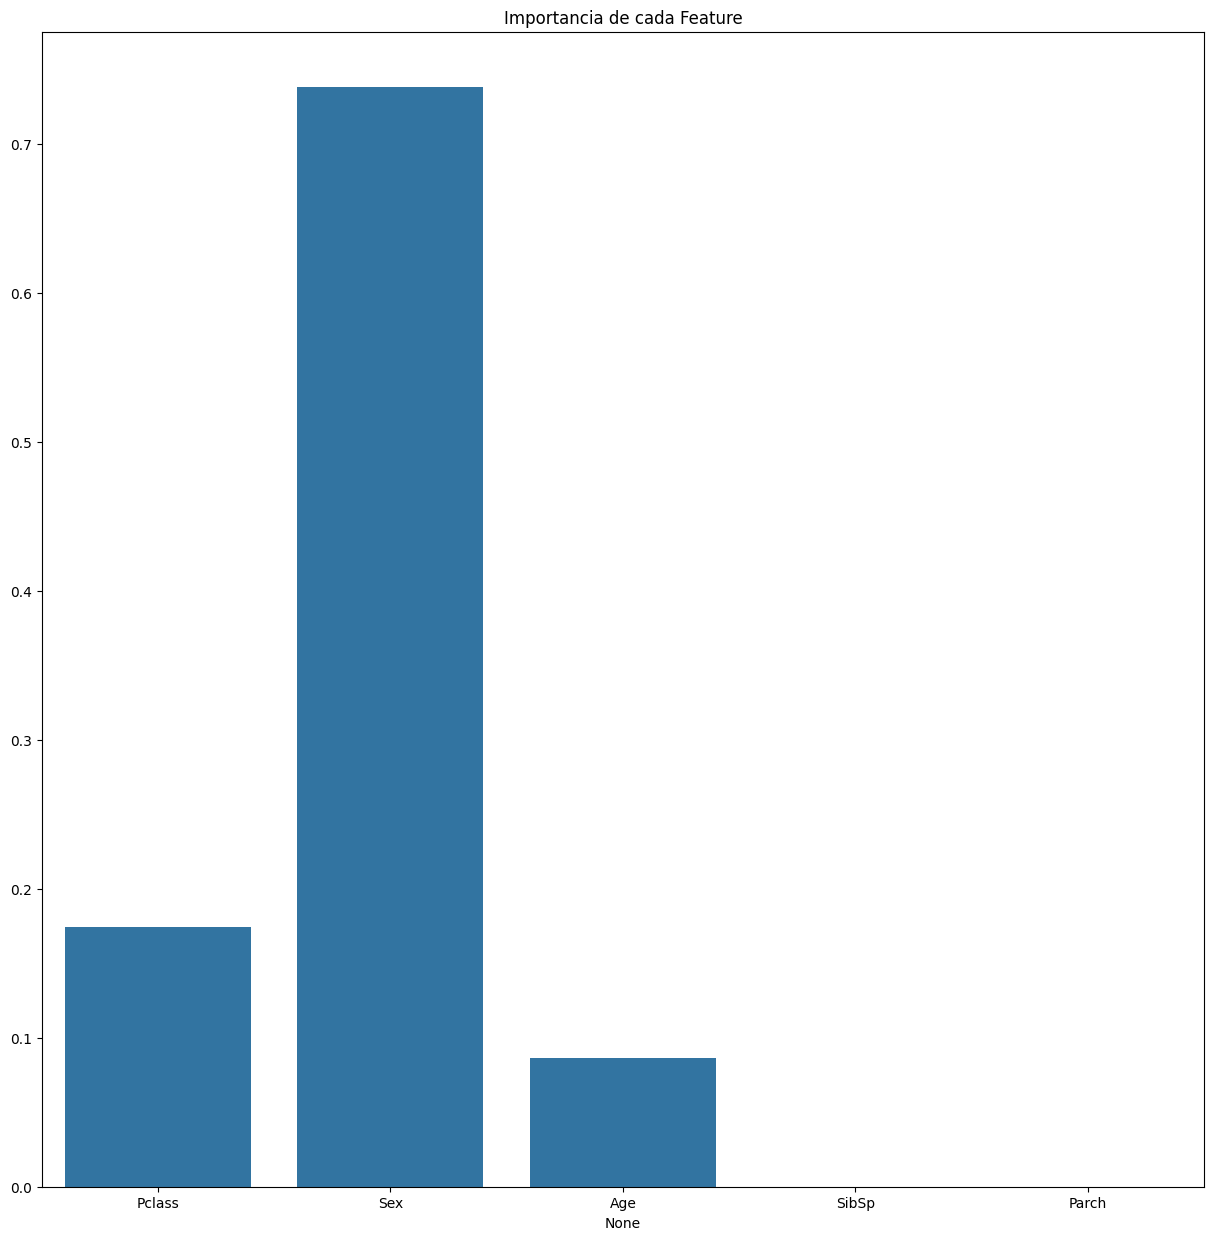

In [26]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()

Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Creamos un random forest!
RF_model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
RF_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [34]:
y_test_pred_RF = RF_model.predict(X_test) #Prediccion en Test

In [35]:
#Calculo el accuracy en Test
RF_test_accuracy = accuracy_score(y_test, y_test_pred_RF)

print('% de aciertos sobre el set de evaluación:',RF_test_accuracy)

% de aciertos sobre el set de evaluación: 0.786046511627907
